### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [4]:
ETTh1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh1.csv")
training_df, test_df = split_dataset(ETTh1, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [14]:
p_lag = 48
future_steps = 24
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]
modelling_task = 'univariate'
n_continous_features=7
n_categorial_features=5
dataset_name = 'ETTh1'

#### ETTm2

#### RLinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Rlinear activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 8.648793538856506


Current (running) training loss at iteration 10000 : 6.562962044382095

Epoch 0: 

Train metrics: -------
Running (training) loss is 6.1113286215005465.
Training MAE is 0.6574480403739562.
Training MSE is 6.1722049187958445.

Test metrics: -------
Running (test) loss is 1.817395908662251.
Test MAE is 0.37371173339230673.
Test MSE is 1.8299217181546348.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 4.061437776660919
Current (running) training loss at iteration 10000 : 3.387782948279381

Epoch 1: 

Train metrics: -------
Running (training) loss is 3.226951924939336.
Training MAE is 0.48986920677509505.
Training MSE is 3.3005833083411673.

Test metrics: -------
Running (test) loss is 1.235847974249295.
Test MAE is 0.3091739054237093.
Test MSE is 1.2521535565171924.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteratio

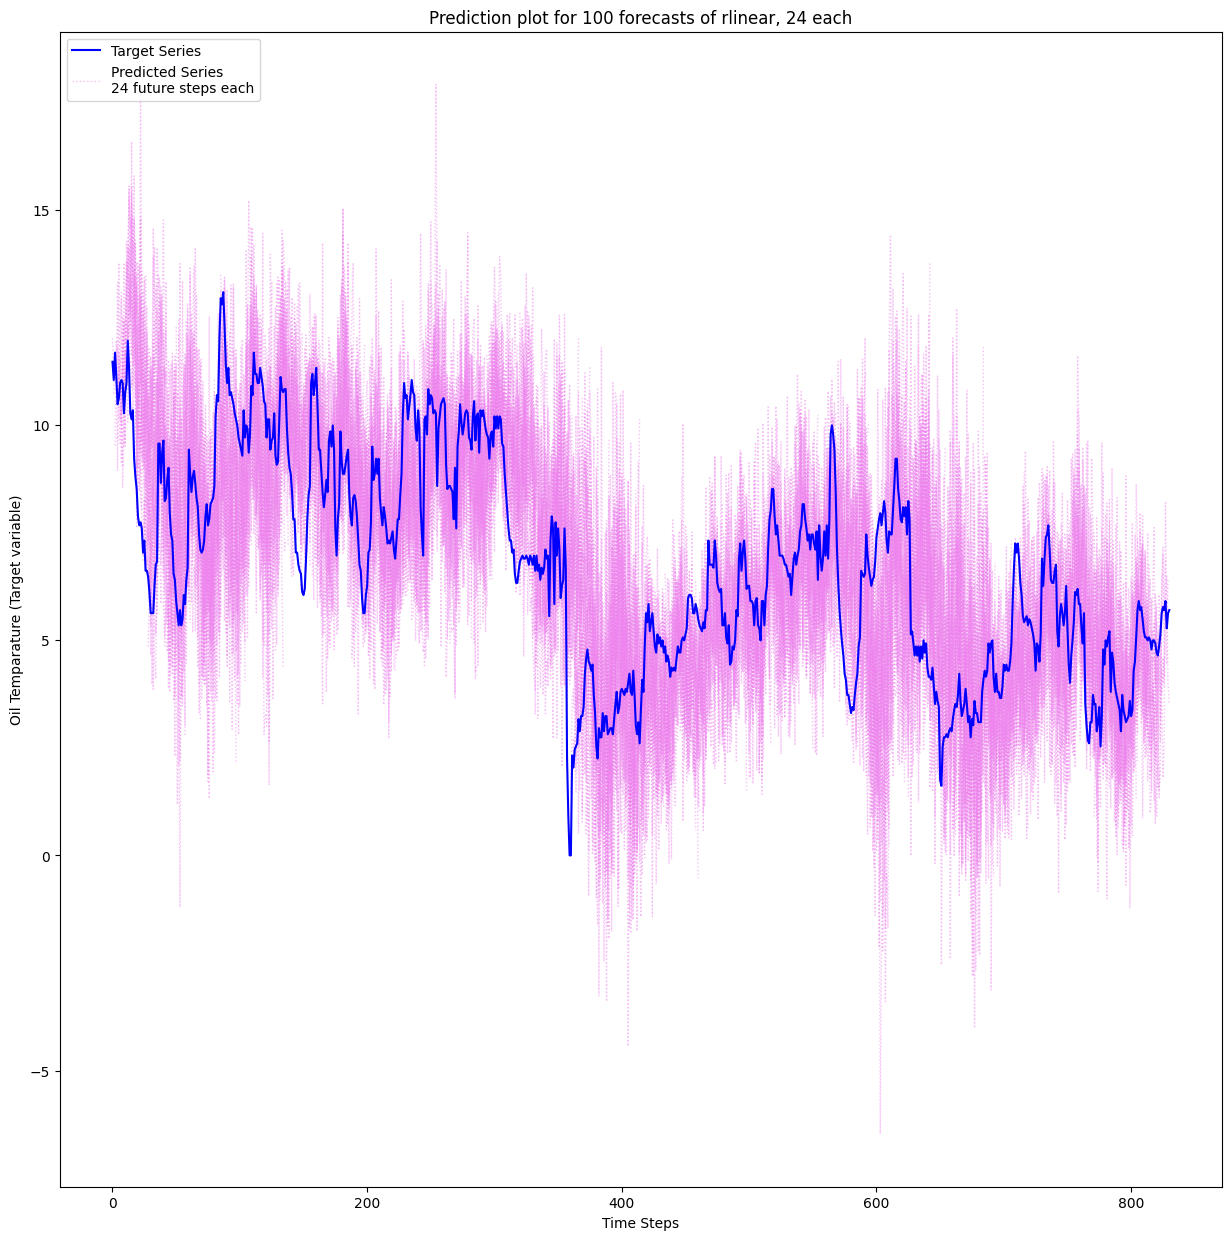

In [15]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### Dlinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Dlinear activated
Points to be estimated
With a shallow network
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 6.880486657714844
Current (running) training loss at iteration 10000 : 4.997625170993805

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.657402048160121.
Training MAE is 0.5710470256219615.
Training MSE is 4.712331071137562.

Test metrics: -------
Running (test) loss is 3.4279593898568836.
Test MAE is 0.534965877873557.
Test MSE is 3.4485792246886664.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 3.8995172017097475
Current (running) training loss at iteration 10000 : 3.1662790784358976

Epoch 1: 

Train metrics: -------
Running (training) loss is 3.016631618930712.
Training MAE is 0.48268439043633304.
Training MSE is 3.083163397377709.

Test metrics: -------
Running (test) loss is 3.0639722646985734.
Test MAE is 0.5052626533167702.
Test MSE is 3.089717574289867.
---------------------------
Current learning rate is : 5e-05
---

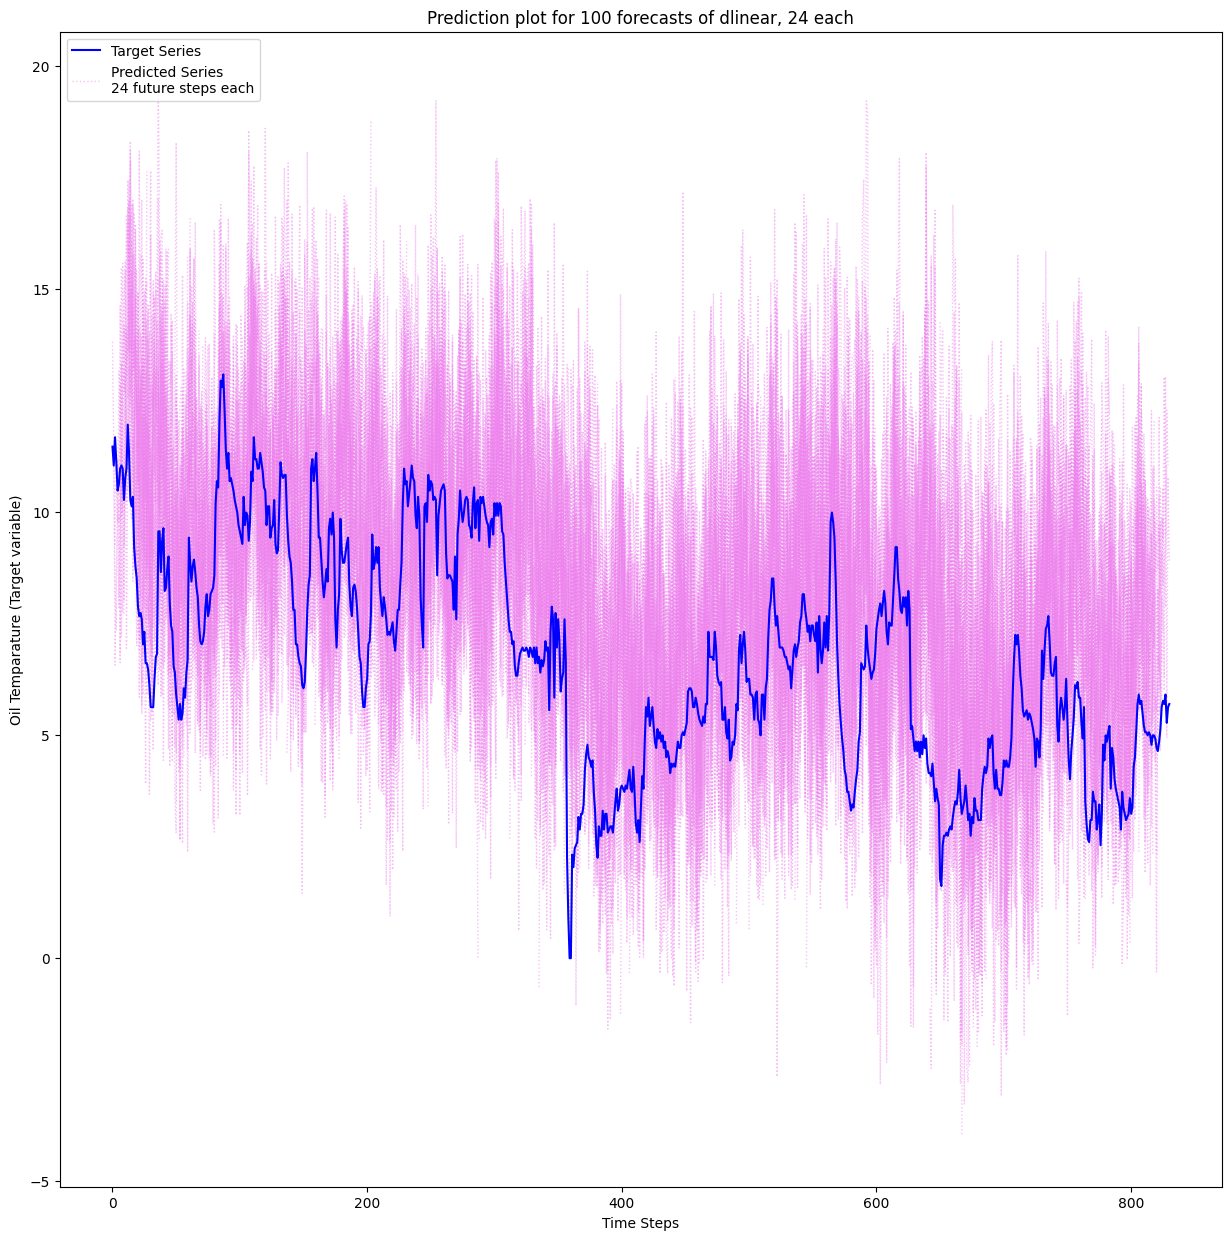

In [16]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'dlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### RLMP

Random seed set as 42
Univatiate modelling
inflation factor = 1
RMLP activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 11.40872658443451
Current (running) training loss at iteration 10000 : 7.280252528452873

Epoch 0: 

Train metrics: -------
Running (training) loss is 6.530512896333773.
Training MAE is 0.6487323939288195.
Training MSE is 6.586039848528367.

Test metrics: -------
Running (test) loss is 0.9437669715711049.
Test MAE is 0.2714613318869046.
Test MSE is 0.9574977133103779.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 2.2000317432403564
Current (running) training loss at iteration 10000 : 1.8132314876794815

Epoch 1: 

Train metrics: -------
Running (training) loss is 1.7101205495522194.
Training MAE is 0.35754383048138666.
Training MSE is 1.7795506053056913.

Test metrics: -------
Running (test) loss is 0.5492099509068897.
Test MAE is 0.20782472352896417.
Test MSE is 0.5638840544223785.
---------------------------
Current learning rate is : 5e-0

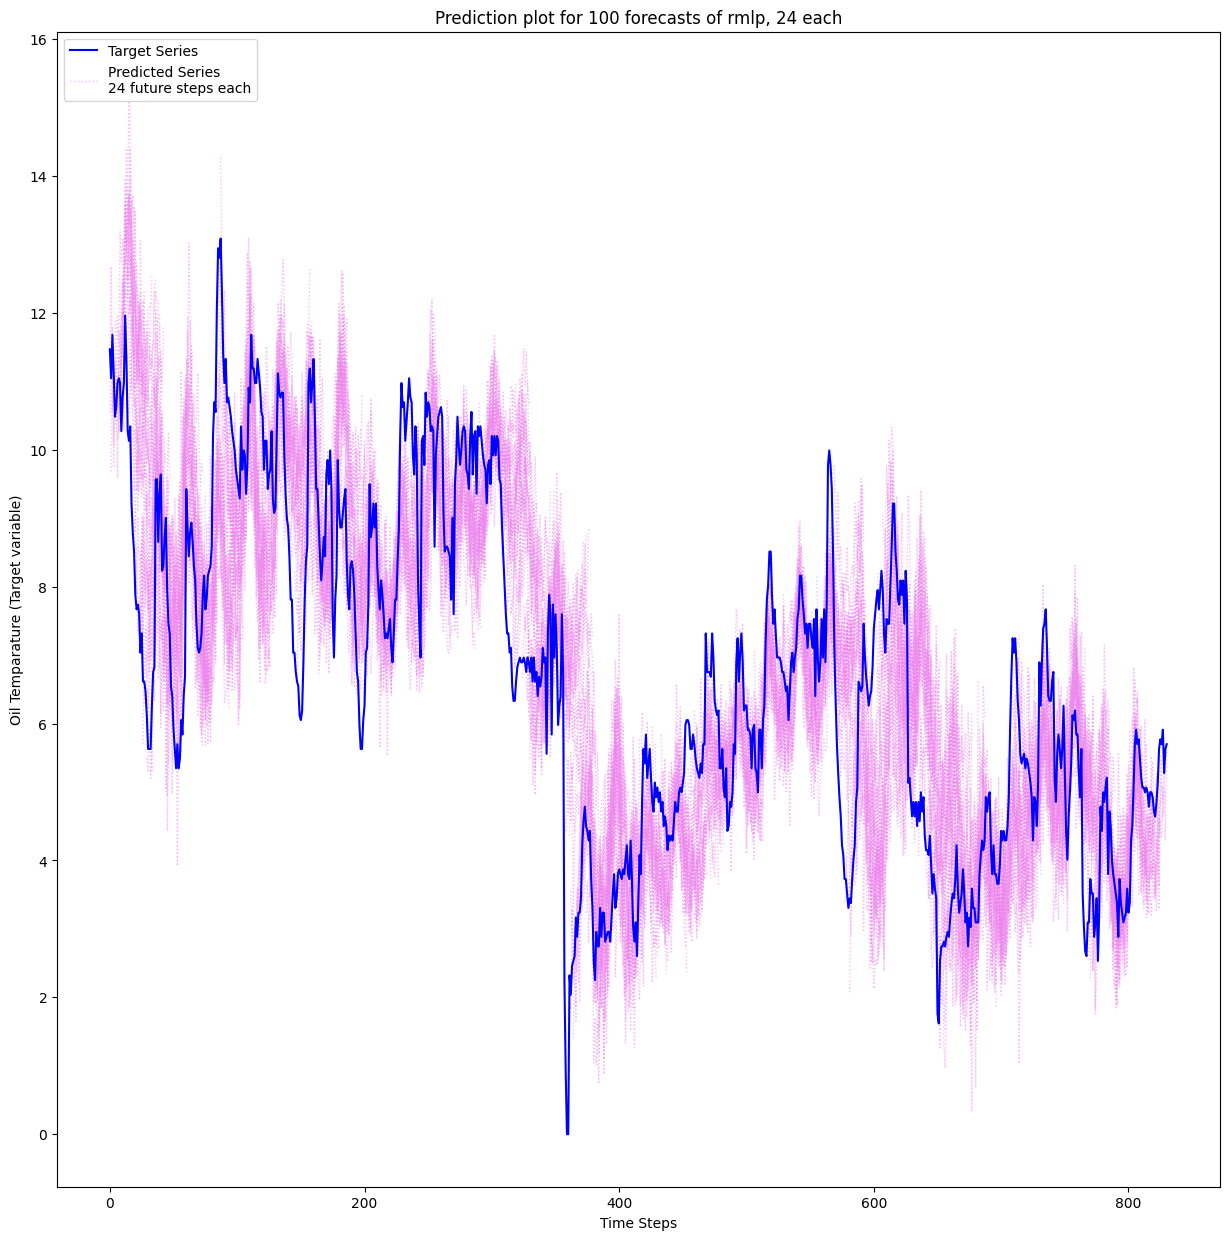

In [17]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rmlp', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)